In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [196]:
# Загрузка данных с Excel таблицы
data = pd.read_excel('AirQualityUCI.xlsx')
data.replace(-200, np.nan, inplace=True)

In [197]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [198]:
data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,7674.000000,8991.000000,914.000000,8991.000000,8991.000000,7718.000000,8991.000000,7715.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,2.152750,1099.707856,218.811816,10.082993,939.029205,246.881252,835.370973,113.075515,1456.143486,1022.780725,18.316054,49.232360,1.025530
std,1.453252,217.084571,204.459921,7.449640,266.829000,212.971224,256.815106,48.359250,346.204540,398.480897,8.832888,17.316389,0.403813
min,0.100000,647.250000,7.000000,0.149048,383.250000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.175000,0.184679
25%,1.100000,936.750000,67.000000,4.436942,734.375000,98.000000,657.875000,78.000000,1226.625000,731.375000,11.787500,35.812500,0.736769
50%,1.800000,1063.000000,150.000000,8.239851,909.000000,179.800000,805.500000,109.000000,1462.750000,963.250000,17.750000,49.550000,0.995395
75%,2.900000,1231.250000,297.000000,13.988478,1116.250000,326.000000,969.250000,142.000000,1673.500000,1273.375000,24.400000,62.500001,1.313701
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [199]:
data.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

In [200]:
# Убираем строчки в которых отсутствует искомая величина
data.dropna(axis=0, subset=['C6H6(GT)'], inplace=True)

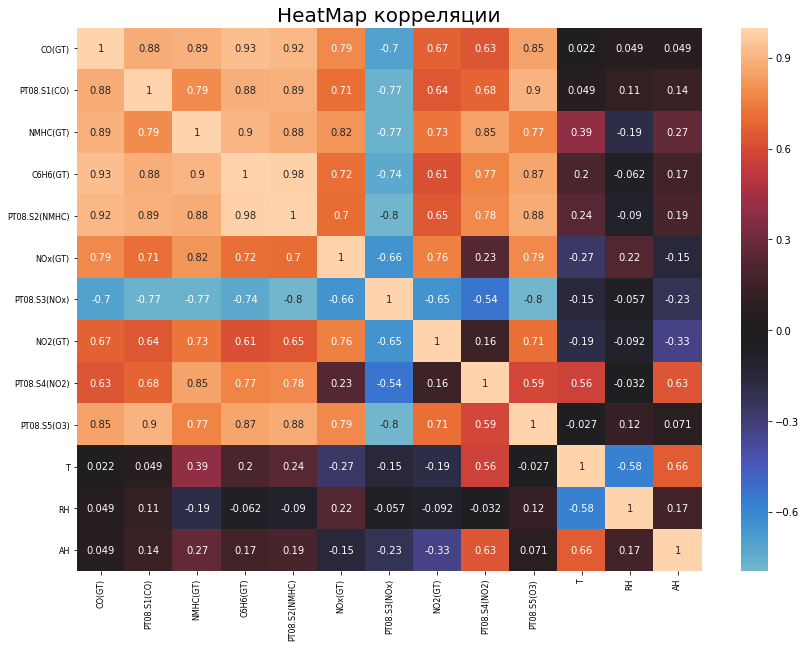

In [201]:
plt.figure(figsize=(14,10))
ax = sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, center=0, annot=True)
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)
plt.title('HeatMap корреляции', fontsize=20)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

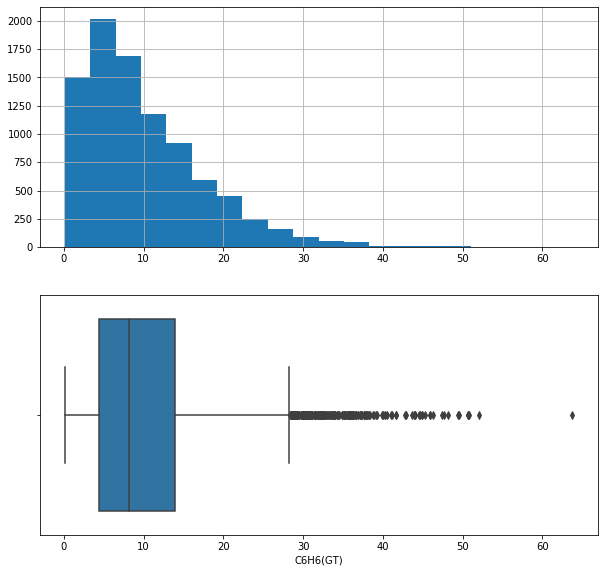

In [202]:
# Вывод target колонки
plt.figure(figsize = (10, 15))
plt.subplot(3, 1, 1)
data['C6H6(GT)'].hist(bins=20)
plt.subplot(3, 1, 2)
sns.boxplot(data['C6H6(GT)'])


Данные имеют большое количество выбросов, при обучении модели будет использоваться MAE, как основная метрика, так как она более устойчива к ним. 

In [203]:
cols_with_missing = [col for col in data.columns if data[col].isnull().any()]

In [204]:
# Колонки в которых встречаются пропущенные значения
data[cols_with_missing].describe()

,CO(GT),NMHC(GT),NOx(GT),NO2(GT)
count,7344.000000,887.000000,7396.000000,7393.000000
mean,2.129711,218.607666,242.174351,112.129974
std,1.436472,206.615130,206.304577,47.618852
min,0.100000,7.000000,2.000000,2.000000
25%,1.100000,66.000000,97.000000,77.000000
50%,1.800000,145.000000,178.000000,108.500000
75%,2.800000,297.000000,321.000000,140.000000
max,11.900000,1189.000000,1479.000000,332.600000


In [205]:
for col in cols_with_missing:
    print(col, len(data[data[col].isnull()]))

CO(GT) 1647
NMHC(GT) 8104
NOx(GT) 1595
NO2(GT) 1598


NMHC(GT) - отсутсвует более 90% записей, в отдельных случаях имеет смысл предсказать значение этой переменной с помощью линейной модели, в данном случае есть два варианта, либо удалить столбец полностью, либо добавить отдельный бинарный параметр, отвечающий за наличие данных по NMHC(GT) в n-ой строке датафрема. Остальные столбцы можно заполнить средним, в соответсвии с распредлением. В целом, эти данные представляют собой временной ряд, и имеет смысл воспользоваться алгоритмом заполнения пропусков в них.

### Заполнение пропусков

Для заполнения 

In [206]:
# from datetime import datetime, time
# data['is_NMHC_nan']=data['NMHC(GT)'].isnull()

In [207]:
# data[~data['is_NMHC_nan']]['NMHC(GT)'].plot()

Так как, данные представляют собой временной ряд, внесение константного параметра сильно испортит данные, в данной ситуации

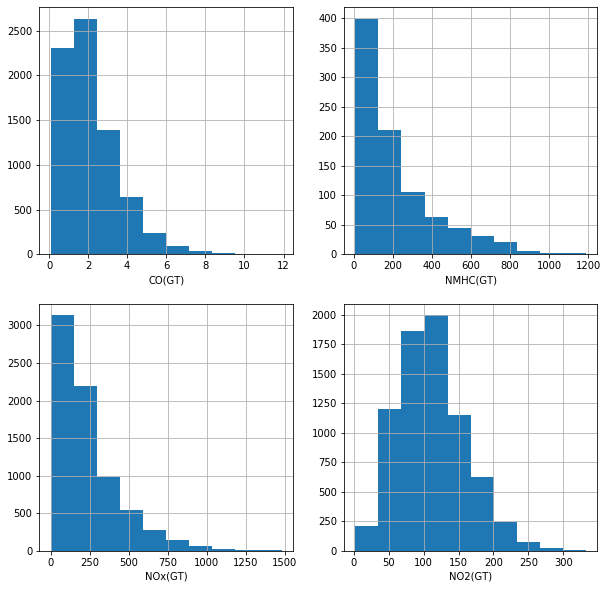

In [208]:
plt.figure(figsize=(10,10))
i = 1
for col in cols_with_missing:
    plt.subplot(2, 2, i)
    plt.xlabel(col)
    data[col].hist()
    i += 1

Для 3 остальных параметров лучше использовать median, как способ заполнения, так как mean будет чувтвителен к выбросам, которые присутвуют в 2/3 параметров. Для NO2, можно использовать mean, так как выбросов не так много.

In [209]:
data.drop('NMHC(GT)', axis = 1, inplace=True)
data.set_index(['Date', 'Time'], inplace=True)

In [210]:
from sklearn.preprocessing import Imputer

imp = Imputer(strategy='median')
c = data.columns
data = pd.DataFrame(imp.fit_transform(data))
data.columns=c

In [211]:
cols_with_missing = [col for col in data.columns if data[col].isnull().any()]
cols_with_missing

[]

In [212]:
# plt.figure(figsize=(16,10), dpi= 80)
# plt.plot('date', 'NMHC(GT)', data=df, color='tab:red')

# # Decoration
# plt.ylim(50, 750)
# xtick_location = df.index.tolist()[::12]
# xtick_labels = [x[-4:] for x in df.date.tolist()[::12]]
# plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=0, fontsize=12, horizontalalignment='center', alpha=.7)
# plt.yticks(fontsize=12, alpha=.7)
# plt.title("Air Passengers Traffic (1949 - 1969)", fontsize=22)
# plt.grid(axis='both', alpha=.3)
# plt.show()

## Нормализация данных (z-score)

In [213]:
from sklearn.preprocessing import StandardScaler as scaler
data.sample(frac=1)
y = data['C6H6(GT)']
data.drop('C6H6(GT)', axis=1, inplace = True)
sc = scaler()
c = data.columns
data = pd.DataFrame(sc.fit_transform(data, y))
data.columns = c

In [214]:
data.head()

,CO(GT),PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0.406839,1.199102,0.399045,-0.343350,0.860118,0.035074,0.681301,0.614165,-0.533950,-0.020638,-0.663157
1,-0.053138,0.886995,0.058920,-0.677214,1.317671,-0.451041,0.296392,-0.126815,-0.567915,-0.088497,-0.743065
2,0.100188,1.392586,0.000828,-0.528830,1.186246,0.058223,0.284115,0.128543,-0.726423,0.273897,-0.681767
3,0.100188,1.270507,0.034559,-0.311553,0.999331,0.243409,0.368608,0.452918,-0.828320,0.621852,-0.591440
4,-0.359789,0.794860,-0.388020,-0.528830,1.439361,0.104519,0.097799,0.218892,-0.811337,0.597308,-0.586284


## Линейная регрессия

Алгоритм ниже - линейная регрессия с минимизацией MSE, что не очень хорошо подходит к данному датафрейму.
Написал так, потому что mae не может быть дифференцирована, градиентный спуск написан, через производные для MSE

In [242]:
from sklearn.metrics import mean_squared_error as mse

def lin_reg(data, target, error = mae, eps=0.05, k = 3):
    data['b'] = 1
    data = data.to_numpy()
    target = target.to_numpy()
    weights = np.zeros(data.shape[1])
    er = 0
    new_target = np.dot(data, weights)
    new_er = error(new_target, target)
    t = 1
    while abs(new_er - er) > eps:
        grad = np.zeros(data.shape[1])
        for i in range(len(data)):
            dif = sum(data[i] * weights) - target[i]
            for j in range(data.shape[1]):
                grad[j] += dif * data[i][j] * 2 / data.shape[0]
                
        for j in range(len(weights)):
            weights[j] -= k / t  * grad[j]
        new_target = np.dot(data, weights)
        er = new_er
        new_er = error(new_target, target)
        t += 1
    return weights



def mape(y_pred, y_true): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

Так как в данном случае мы не используем алгоритмы для анализа временных рядов, данные лучше перемешать для повышения точности алгоритма

In [216]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(data, y)

In [222]:
from sklearn.metrics import mean_absolute_error as mae
#from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.linear_model import LinearRegression
w = lin_reg(x_train, y_train)
tmp = x_valid
tmp['b'] = 1
print('Линейная регрессия (ручная функция) mae', mae(np.dot(tmp, w), y_valid))
print('Линейная регрессия (ручная функция) mape', mape(np.dot(tmp, w), y_valid))
pd.DataFrame(tmp.columns, w)

Линейная регрессия (ручная функция) mae 0.8567770411325524
Линейная регрессия (ручная функция) mape 23.67608003012306


,0
0.488728,CO(GT)
0.214517,PT08.S1(CO)
5.626073,PT08.S2(NMHC)
0.898522,NOx(GT)
0.465924,PT08.S3(NOx)
-0.530527,NO2(GT)
1.301615,PT08.S4(NO2)
0.276407,PT08.S5(O3)
-0.407179,T
-0.368136,RH


In [223]:
model = LinearRegression()
model.fit(x_train, y_train)
print('Лин. рег, sklearn, mae', mae(model.predict(x_valid), y_valid))
print('Линейная регрессия sklearn, mape', mape(model.predict(x_valid), y_valid))
t = list(data.columns)
t.append('b')
pd.DataFrame(t, model.coef_)

Лин. рег, sklearn, mae 0.8369776525271354
Линейная регрессия sklearn, mape 22.425572254440194


,0
0.424941,CO(GT)
0.219674,PT08.S1(CO)
7.558746,PT08.S2(NMHC)
0.476849,NOx(GT)
1.002981,PT08.S3(NOx)
-0.377503,NO2(GT)
0.089034,PT08.S4(NO2)
-0.103741,PT08.S5(O3)
-0.826892,T
-0.445954,RH


Алгоритм из библиотеки точнее на 1/100, скорее всего, потому что использует не градиентный спуск, как метод оптимизации, а аналитическое решение регрессии.

In [219]:
data.head()

,CO(GT),PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0.406839,1.199102,0.399045,-0.343350,0.860118,0.035074,0.681301,0.614165,-0.533950,-0.020638,-0.663157
1,-0.053138,0.886995,0.058920,-0.677214,1.317671,-0.451041,0.296392,-0.126815,-0.567915,-0.088497,-0.743065
2,0.100188,1.392586,0.000828,-0.528830,1.186246,0.058223,0.284115,0.128543,-0.726423,0.273897,-0.681767
3,0.100188,1.270507,0.034559,-0.311553,0.999331,0.243409,0.368608,0.452918,-0.828320,0.621852,-0.591440
4,-0.359789,0.794860,-0.388020,-0.528830,1.439361,0.104519,0.097799,0.218892,-0.811337,0.597308,-0.586284


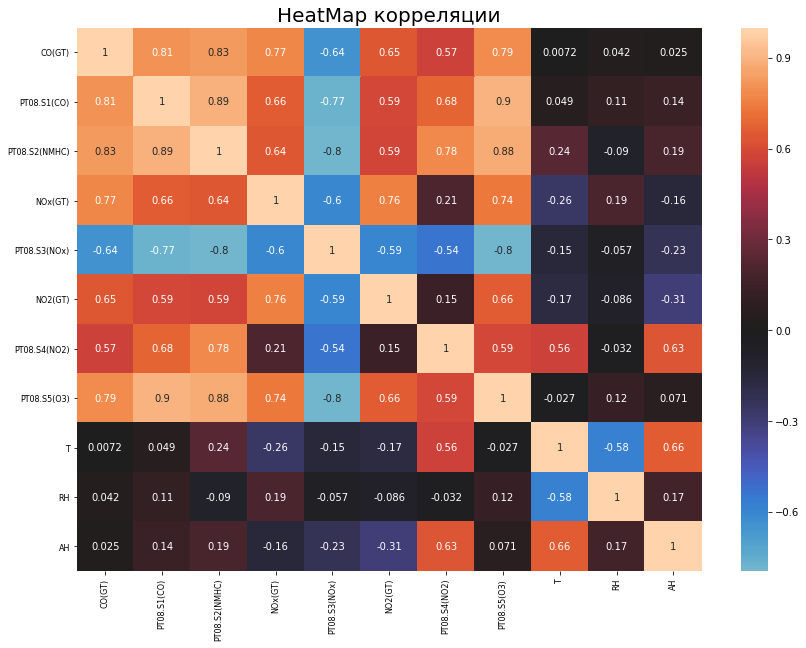

In [220]:
plt.figure(figsize=(14,10))
ax = sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, center=0, annot=True)
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)
plt.title('HeatMap корреляции', fontsize=20)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

Для улучшения базовой модели можно удалить коррелирующие строки, проверка через критерий Фишера. Для след. переменных (CO, PT08.S1), (CO, PT08.S2)<br>
H0 - корреляции нет
H1 - корреляция есть

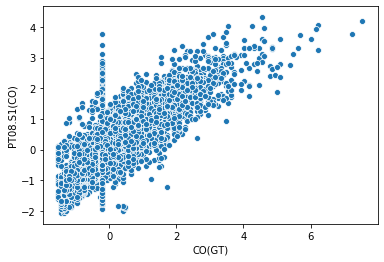

In [163]:
sns.scatterplot(data['CO(GT)'], data['PT08.S1(CO)']) 

In [177]:
# Критерий Фишера
def f1(x, y, a):
    x_m = np.mean(x)
    y_m = np.mean(y)
    r = sum((x-x_m)*(y-y_m))
    r /= sum((x-x_m) ** 2) ** 0.5
    r /= sum((y-y_m) ** 2) ** 0.5
    t = r/(1-r**2)**0.5 * (len(x)-2)**0.5
    t1 = stats.t.ppf(1 - a, len(x)-2)
    if abs(t) > t1:
        return 'Отвергаем H0'
    else:
        return 'Не отвергаем H0'

In [186]:
print(f1(data['CO(GT)'], data['PT08.S1(CO)'], 0.95))
print(f1(data['CO(GT)'], data['PT08.S2(NMHC)'], 0.95))

Отвергаем H0
Отвергаем H0


Удаляем коррелирующие строки

In [230]:
new_data = data.drop('PT08.S2(NMHC)', axis = 1)

In [231]:
x_train, x_valid, y_train, y_valid = train_test_split(new_data, y)
model = LinearRegression()
model.fit(x_train, y_train)
print('Лин. рег, sklearn, mae', mae(model.predict(x_valid), y_valid))
print('Линейная регрессия sklearn, mape', mape(model.predict(x_valid), y_valid))
t = list(data.columns)
pd.DataFrame(model.coef_)

Лин. рег, sklearn, mae 1.4024572499135088
Линейная регрессия sklearn, mape 30.90960782601687


,0
0,0.775092
1,0.809467
2,1.985412
3,-0.734891
4,-0.702493
5,4.425563
6,1.110439
7,-0.994069
8,-1.507151
9,-0.890509


При удалении первого параметра ошибки незначительно понижаются, а при удалении второго повышаются. Разница не настолько велика, чтобы делать выводы о влиянии параметра на результат работы модели.

Подбор гиперпараметров для модели с градиентным спуском (Шаг и точность)

In [236]:
x_train, x_valid, y_train, y_valid = train_test_split(data, y)
from sklearn.metrics import mean_absolute_error as mae
#from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.linear_model import LinearRegression
for i in range(1, 6):
    w = lin_reg(x_train, y_train, eps=0.01, k = i)
    tmp = x_valid
    tmp['b'] = 1
    print('k = ', str(i), ', mae', mae(np.dot(tmp, w), y_valid))
    print('mape', mape(np.dot(tmp, w), y_valid))


k =  1 , mae 1.0381909433169285
mape 25.14444863488905
k =  2 , mae 0.8982523013891718
mape 24.02992140611951
k =  3 , mae 0.8537149575414313
mape 23.625679542019114
k =  4 , mae 0.8369923249539523
mape 23.207389687906073
k =  5 , mae 2.1644725032579
mape 47.931518305431084


KeyboardInterrupt: 

При шаге равном 6/t, где t - номер шага ошибка становится большой. Оптимальный выбор k = 4

In [241]:
x_train, x_valid, y_train, y_valid = train_test_split(data, y)
from sklearn.metrics import mean_absolute_error as mae
#from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.linear_model import LinearRegression
for i in range(1, 6):
    w = lin_reg(x_train, y_train, eps=0.002 * i, k = 4)
    tmp = x_valid
    tmp['b'] = 1
    print('eps = ', str(i * 0.002), ', mae', mae(np.dot(tmp, w), y_valid))
    print('mape', mape(np.dot(tmp, w), y_valid))


eps =  0.002 , mae 0.8288288999477696
mape 24.772699028233536
eps =  0.004 , mae 0.8288288999477696
mape 24.772699028233536
eps =  0.006 , mae 0.8288288999477696
mape 24.772699028233536
eps =  0.008 , mae 0.8288288999477696
mape 24.772699028233536
eps =  0.01 , mae 0.8288630105254754
mape 24.76549025105866


Оптимальная точность получается при eps >= 0.01

In [254]:
def sgd_reg(data, target, error = mse, eps=0.01, k = 4):
    data['b'] = 1
    data = data.to_numpy()
    target = target.to_numpy()
    weights = np.zeros(data.shape[1])
    er = 0
    new_target = np.dot(data, weights)
    new_er = error(new_target, target)
    i = 0
    for i in range(data.s):
        grad = np.zeros(data.shape[1])
        dif = sum(data[i] * weights) - target[i]
        for j in range(data.shape[1]):
                grad[j] += dif * data[i][j] * 2 / data.shape[0]
        weights[j] -= k / (i + 1)  * grad[j]
        new_target = np.dot(data, weights)
        er = new_er
        new_er = error(new_target, target)
    return weights
        

In [255]:
w = sgd_reg(x_train, y_train)

1
2
3
4
5
6


In [249]:
tmp = x_valid
tmp['b'] = 1
print(mae(np.dot(tmp, w), y_valid))

10.107962025093096


In [ ]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor(loss='huber')
model.fit(x_train, y_train)
print(mae())